In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
# 3. Basic EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
None
          Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000  1000.000000           1000.000000              970.000000   
mean    500.500000    10.059970             16.982000                4.579381   
s

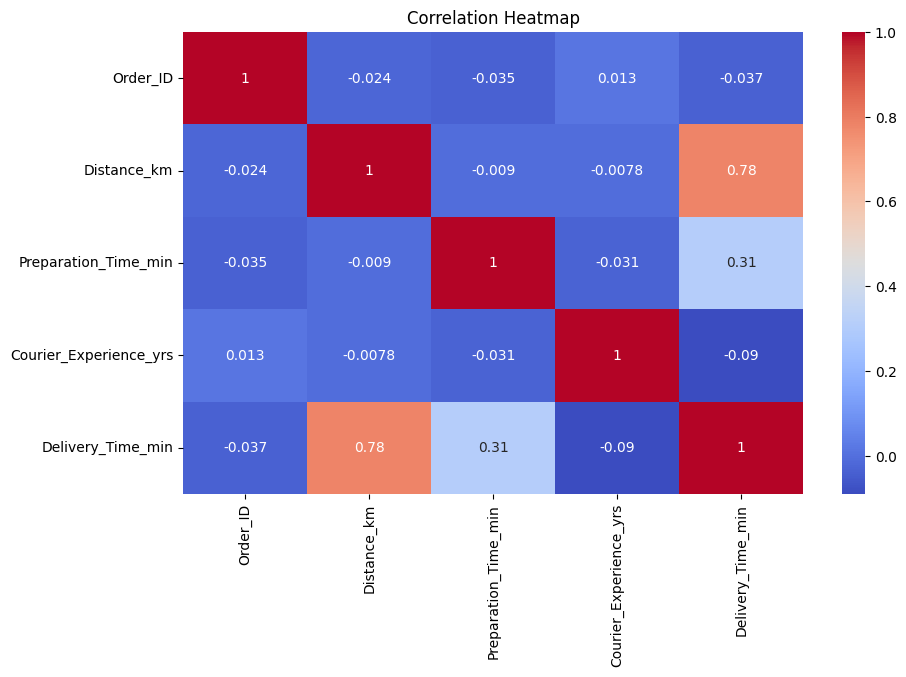

In [6]:
# 4. Heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [7]:
# 5. Handle categorical variables
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [9]:
# 6. Split features and target
X = df.drop("Delivery_Time_min", axis=1)  # Replace with actual target name
y = df["Delivery_Time_min"]


In [10]:
# 7. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()


In [11]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [18]:
df['Delivery_Time_min'].fillna(df['Delivery_Time_min'].mean(), inplace=True)

In [20]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

In [22]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical values (fill with mean)
num_imputer = SimpleImputer(strategy='mean')

# Fit and transform X_train
X_train_imputed = num_imputer.fit_transform(X_train)

# Transform X_test using the same imputer
X_test_imputed = num_imputer.transform(X_test)


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_imputed, y_train)  # Now training on clean data


LinearRegression()

In [29]:
# 10. Make Predictions
y_pred = model.predict(X_test_imputed)

# 11. Evaluate the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared (R2):", round(r2, 2))

Mean Absolute Error (MAE): 0.33
Mean Squared Error (MSE): 0.23
Root Mean Squared Error (RMSE): 0.48
R-squared (R2): 0.75


In [30]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


     Actual  Predicted
0 -1.121130  -0.768585
1  0.510792   0.274534
2 -0.803812  -0.864727
3 -0.577156  -0.354052
4  1.281421   1.674112


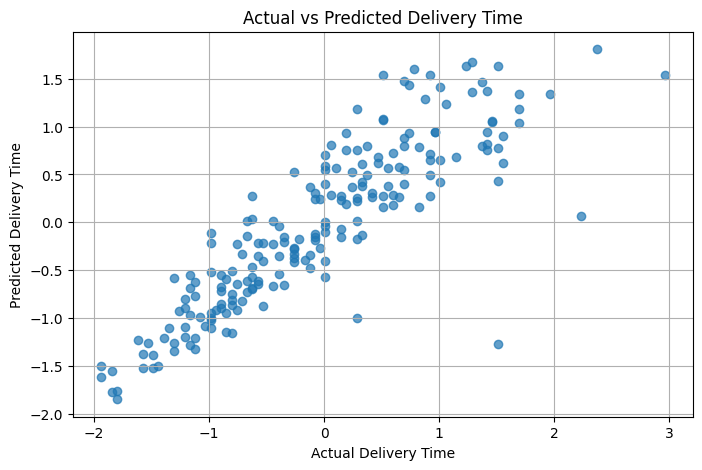

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time')
plt.grid(True)
plt.show()
